# Shanks transform

Example from wikipedia: https://en.wikipedia.org/wiki/Shanks_transformation

In [19]:
from itertools import accumulate

In [108]:
def shanks(partial_sums: list[float])-> float :
    """
    Coeffs: coefficients of the sequence
    """
    if len(partial_sums)<=2:
        raise Exception("Cannot find Shanks transform of this list")
    
    sn = []
    for i in range(1, len(partial_sums) - 1):
        anp = partial_sums[i+1]
        anm = partial_sums[i-1]
        an = partial_sums[i]

        sna = anp - ((anp-an)**2 / ((anp-an) - (an-anm)))
        # print(anm, an, anp, "S(An): ",  sna)
        sn.append(sna)
    return sn

def partial(coeffs, n):
    return sum(coeffs[:n])

In [113]:
example_series = lambda N: [4*(-1)**(n)/(2*n+1) for n in range(N+1)]
partial_sum = lambda N : list(accumulate(example_series(N)))

In [116]:
import matplotlib.pyplot as plt

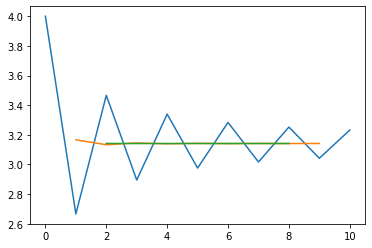

In [145]:
n = 10
point_list = [i for i in range(0, n+1)]
init_list = partial_sum(n)
plt.plot(point_list,init_list)
plt.plot(point_list[1:-1],shanks(init_list))
plt.plot(point_list[2:-2],shanks(shanks(init_list)))

In [174]:
import math
rel_error = lambda l: [f"{idx}: {abs(k-math.pi)/math.pi * 100:.4f} %" for idx, k in enumerate(l)]

In [178]:
print(rel_error(init_list))
print(rel_error(shanks(init_list)))
print(rel_error(shanks(shanks(init_list))))
print(rel_error(shanks(shanks(shanks(init_list)))))

['0: 27.3240 %', '1: 15.1174 %', '2: 10.3474 %', '3: 7.8417 %', '4: 6.3054 %', '5: 5.2695 %', '6: 4.5246 %', '7: 3.9636 %', '8: 3.5260 %', '9: 3.1752 %', '10: 2.8878 %']
['0: 0.7981 %', '1: 0.2629 %', '2: 0.1160 %', '3: 0.0608 %', '4: 0.0357 %', '5: 0.0226 %', '6: 0.0153 %', '7: 0.0108 %', '8: 0.0079 %']
['0: 0.0163 %', '1: 0.0045 %', '2: 0.0016 %', '3: 0.0007 %', '4: 0.0003 %', '5: 0.0002 %', '6: 0.0001 %']
['0: 0.0002 %', '1: 0.0001 %', '2: 0.0000 %', '3: 0.0000 %', '4: 0.0000 %']


---

In [197]:
%timeit k1 = partial_sum(400000)[-1]

180 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
%timeit k2 = shanks(shanks(partial_sum(5)))

6.65 µs ± 35.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
